# Gradient Descent - Lab

## Introduction

In this lab, you'll continue to formalize your knowledge of gradient descent by coding the algorithm yourself. In the upcoming labs, you'll apply similar procedures to implement logistic regression on your own.


## Objectives

In this lab you will: 


- Implement gradient descent from scratch to minimize OLS


## Use gradient descent to minimize OLS

To practice gradient descent, you'll investigate a simple regression case in which you're looking to minimize the Residual Sum of Squares (RSS) between the predictions and the actual values. Remember that this is referred to as Ordinary Least Squares (OLS) regression. You'll compare two simplistic models and use gradient descent to improve upon these initial models.


## Load the dataset

- Import the file `'movie_data.xlsx'` using Pandas 
- Print the first five rows of the data 

> You can use the `read_excel()` function to import an Excel file. 

In [2]:
# Import the data
import pandas as pd
df = pd.read_excel('movie_data.xlsx')  # for .xlsx files


# Print the first five rows of the data
df.head()

,budget,domgross,title
0,13000000,25682380,21 &amp; Over
1,45658735,13414714,Dredd 3D
2,20000000,53107035,12 Years a Slave
3,61000000,75612460,2 Guns
4,40000000,95020213,42


## Two simplistic models

Imagine someone is attempting to predict the domestic gross sales of a movie based on the movie's budget, or at least further investigate how these two quantities are related. Two models are suggested and need to be compared.  
The two models are:  

$\text{domgross} = 1.575 \cdot \text{budget}$  
$\text{domgross} = 1.331 \cdot \text{budget}$  


Here's a graph of the two models along with the actual data:

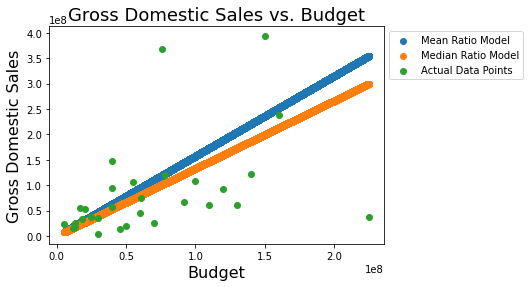

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(start=df['budget'].min(), stop=df['budget'].max(), num=10**5)
plt.scatter(x, 1.575*x, label='Mean Ratio Model') # Model 1
plt.scatter(x, 1.331*x, label='Median Ratio Model') # Model 2
plt.scatter(df['budget'], df['domgross'], label='Actual Data Points')
plt.title('Gross Domestic Sales vs. Budget', fontsize=18)
plt.xlabel('Budget', fontsize=16)
plt.ylabel('Gross Domestic Sales', fontsize=16)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

## Error/Loss functions

To compare the two models (and future ones), a metric for evaluating and comparing models to each other is needed. Traditionally, this is the residual sum of squares. As such you are looking to minimize  $ \sum(\hat{y}-y)^2$.
Write a function `rss()` which calculates the residual sum of squares for a simplistic model: 

$\text{domgross} = m \cdot \text{budget}$ 

In [5]:
def rss(m, X=df['budget'], y=df['domgross']):
    y_pred = m * X
    return np.sum((y - y_pred) ** 2)


## Find the RSS for the two models
Which of the two models is better?

In [6]:
# Your code here
rss_model1 = rss(1.575)  # Mean Ratio
rss_model2 = rss(1.331)  # Median Ratio

print(f"RSS for Model 1 (1.575x): {rss_model1:,.2f}")
print(f"RSS for Model 2 (1.331x): {rss_model2:,.2f}")


RSS for Model 1 (1.575x): 276,145,121,423,761,280.00
RSS for Model 2 (1.331x): 235,472,120,578,145,536.00


In [7]:
# Your response here
if rss_model1 < rss_model2:
    print("Model 1 (Mean Ratio) is better.")
else:
    print("Model 2 (Median Ratio) is better.")


Model 2 (Median Ratio) is better.


## Gradient descent

Now that you have a loss function, you can use numerical methods to find a minimum to the loss function. By minimizing the loss function, you have achieved an optimal solution according to the problem formulation. Here's the outline of gradient descent from the previous lesson:  

1. Define initial parameters:
    1. pick a starting point
    2. pick a step size $\alpha$ (alpha)
    3. choose a maximum number of iterations; the algorithm will terminate after this many iterations if a minimum has yet to be found
    4. (optionally) define a precision parameter; similar to the maximum number of iterations, this will terminate the algorithm early. For example, one might define a precision parameter of 0.00001, in which case if the change in the loss function were less than 0.00001, the algorithm would terminate. The idea is that we are very close to the bottom and further iterations would make a negligible difference 
2. Calculate the gradient at the current point (initially, the starting point)
3. Take a step (of size alpha) in the direction of the gradient
4. Repeat steps 2 and 3 until the maximum number of iterations is met, or the difference between two points is less then your precision parameter  

To start, visualize the cost function. Plot the cost function output for a range of m values from -3 to 5.

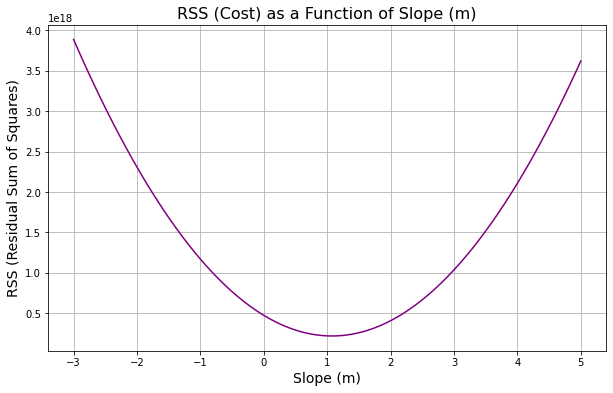

In [9]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of slope values
m_values = np.linspace(-3, 5, 500)
rss_values = [rss(m) for m in m_values]

plt.figure(figsize=(10, 6))
plt.plot(m_values, rss_values, color='purple')
plt.title('RSS (Cost) as a Function of Slope (m)', fontsize=16)
plt.xlabel('Slope (m)', fontsize=14)
plt.ylabel('RSS (Residual Sum of Squares)', fontsize=14)
plt.grid(True)
plt.show()


As you can see, this is a simple cost function. The minimum is clearly around 1. With that, it's time to implement gradient descent in order to find the optimal value for m.

In [10]:
import numpy as np

# Set a starting point for m
cur_x = 0  # starting slope

# Initialize a step size (learning rate)
alpha = 0.01

# Initialize a precision threshold
precision = 0.0000001

# Track change in x between iterations
previous_step_size = 1

# Maximum number of iterations
max_iters = 10000

# Iteration counter
iters = 0

# Gradient Descent Loop
while previous_step_size > precision and iters < max_iters:
    # Survey a small region around the current slope
    x_survey_region = np.linspace(start=cur_x - previous_step_size, 
                                  stop=cur_x + previous_step_size, 
                                  num=101)
    
    # Evaluate the cost (RSS) at each surveyed point
    rss_survey_region = [np.sqrt(rss(m)) for m in x_survey_region]
    
    # Estimate the gradient at the midpoint
    gradient = np.gradient(rss_survey_region)[50]  # central gradient
    
    # Save previous x
    prev_x = cur_x
    
    # Move in the direction of the negative gradient
    cur_x = cur_x - alpha * gradient
    
    # Update step size and iteration counter
    previous_step_size = abs(cur_x - prev_x)
    iters += 1

# Output the result
print("The local minimum occurs at", cur_x)


The local minimum occurs at nan


c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\function_base.py:1057: RuntimeWarning: invalid value encountered in subtract
  out[tuple(slice1)] = (f[tuple(slice4)] - f[tuple(slice2)]) / (2. * ax_dx)
c:\Users\Admin\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\function_base.py:1078: RuntimeWarning: invalid value encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)] - f[tuple(slice3)]) / dx_0


## Plot the minimum on your graph
Replot the RSS cost curve as above. Add a red dot for the minimum of this graph using the solution from your gradient descent function above.

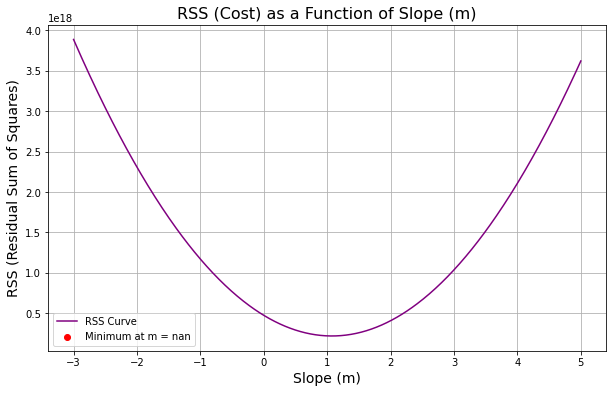

In [11]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np

# Assuming df, rss(), and cur_x (optimal m from gradient descent) are already defined

# Generate a range of slope values
m_values = np.linspace(-3, 5, 500)

# Compute RSS for each slope
rss_values = [rss(m) for m in m_values]

# Compute RSS for optimal m (from gradient descent)
min_rss = rss(cur_x)

# Plot RSS cost function
plt.figure(figsize=(10, 6))
plt.plot(m_values, rss_values, label='RSS Curve', color='purple')
plt.scatter(cur_x, min_rss, color='red', label=f'Minimum at m = {cur_x:.4f}', zorder=5)
plt.title('RSS (Cost) as a Function of Slope (m)', fontsize=16)
plt.xlabel('Slope (m)', fontsize=14)
plt.ylabel('RSS (Residual Sum of Squares)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


## Summary 

In this lab, you coded up a gradient descent algorithm from scratch! In the next lab, you'll apply this to logistic regression in order to create a full implementation yourself!